# Lecture 7: Data Aggregation/grouping and Pivot table using Pandas

Instructor: Md Shahidullah Kawsar
<br>Data Scientist, IDARE, Houston, TX, USA

#### Objectives:
- Data filtering
- Data preprocessing
- Data Aggregation/grouping 
- Pivot table
- Data Visualization: Barplot

#### References:

[1] https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html
<br>[2] https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html

In [103]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_context("talk")
sns.set_style("darkgrid")

#### Load data

In [104]:
df = pd.read_csv("bmw.csv")
display(df.head())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


#### check the number of unique values in the 'model' column

In [105]:
print(df['model'].unique())

[' 5 Series' ' 6 Series' ' 1 Series' ' 7 Series' ' 2 Series' ' 4 Series'
 ' X3' ' 3 Series' ' X5' ' X4' ' i3' ' X1' ' M4' ' X2' ' X6' ' 8 Series'
 ' Z4' ' X7' ' M5' ' i8' ' M2' ' M3' ' M6' ' Z3']


#### data filtering

In [106]:
df_m6 = df[df['model'] == ' M6']

display(df_m6)
print(df_m6.shape)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
1113,M6,2016,35898,Semi-Auto,26642,Petrol,555,28.5,4.4
1195,M6,2016,36995,Semi-Auto,19000,Petrol,555,27.4,4.4
1210,M6,2015,34147,Semi-Auto,34017,Petrol,555,28.5,4.4
6542,M6,2018,46995,Semi-Auto,8207,Petrol,145,28.5,4.4
7953,M6,2015,33500,Automatic,28314,Petrol,555,28.5,4.4
9229,M6,2006,12495,Semi-Auto,89000,Petrol,570,19.1,5.0
9241,M6,2014,28490,Automatic,53249,Petrol,565,28.5,4.4
10346,M6,2014,29000,Automatic,34000,Petrol,565,28.5,4.4


(8, 9)


In [107]:
# find the average price of the ' M6' model cars
df_m6['price'].sum()/8

32190.0

#### Data Aggregation

In [108]:
df_agg = df.groupby('model')['price'].agg(['count', 'mean', 'sum'])

display(df_agg)

,count,mean,sum
model,,,
1 Series,1969,15821.670391,31152869
2 Series,1229,19539.371847,24013888
3 Series,2443,19880.857962,48568936
4 Series,995,22498.418090,22385926
5 Series,1056,22537.428030,23799524
6 Series,108,24354.370370,2630272
7 Series,106,36934.320755,3915038
8 Series,39,63997.794872,2495914
M2,21,43140.333333,905947


#### Data preprocessing before visualization

In [109]:
# sort the dataframe based on the column 'count'
df_agg = df_agg.sort_values(by='count', ascending=False)

# create a new column percentage of the cars in each model
df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100

# convert the 'sum' column in millions
df_agg['sum'] = df_agg['sum']/1000000

# keep up to two decimal points
df_agg = df_agg.round(2)

# remove the 'count' column
df_agg = df_agg.drop('count', axis=1)

display(df_agg.head())

,mean,sum,percent_of_cars
model,,,
3 Series,19880.86,48.57,22.66
1 Series,15821.67,31.15,18.26
2 Series,19539.37,24.01,11.40
5 Series,22537.43,23.80,9.80
4 Series,22498.42,22.39,9.23


#### Barplot: Percentage of cars, Average and Total selling price of cars by model, transmission and fuelType
#### Questions in mind: Based on model, transmission and fuelType,

- What are the top 5 selling car models in the dataset?
- What's the average selling price of the top 5 selling car models?
- What's the total sale of the top 5 selling car models?

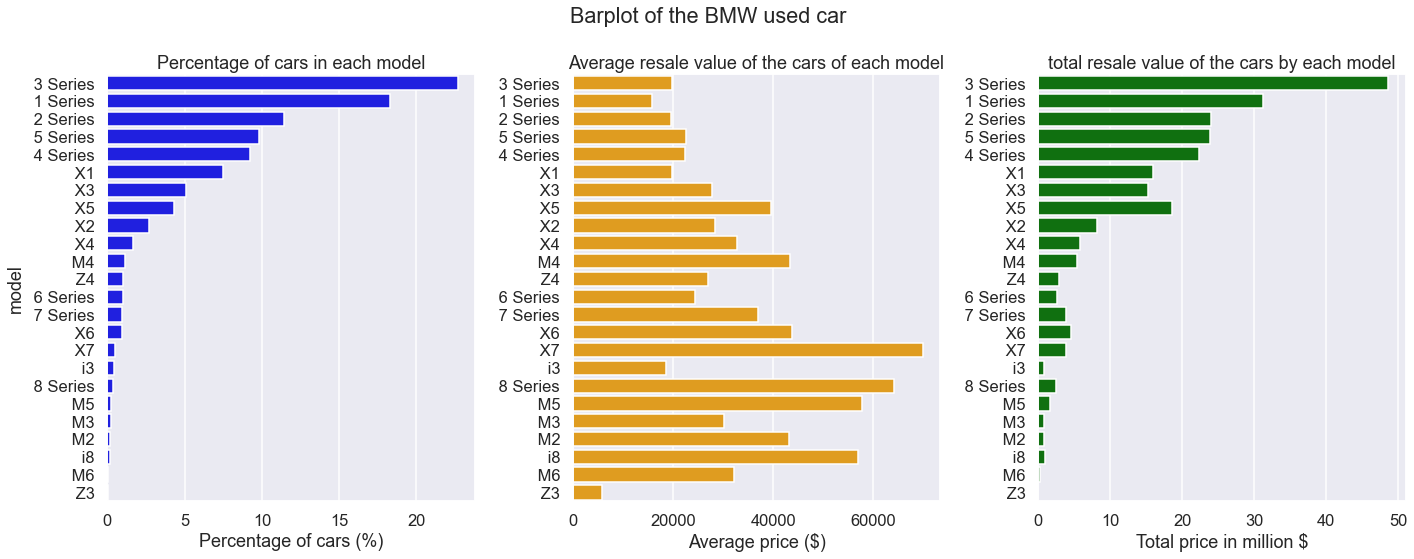

In [110]:
plt.figure(figsize=(20,8))

plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg.index, data=df_agg, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")
# plt.grid()

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg.index, data=df_agg, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg.index, data=df_agg, orient='h', color='green')
plt.title("total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

plt.suptitle("Barplot of the BMW used car")
plt.tight_layout()
plt.show()

#### Create a pivot table

In [111]:
df_pivot = pd.pivot_table(df, index='model', values='price', aggfunc=['count', 'mean', 'sum'])
display(df_pivot)

,count,mean,sum
,price,price,price
model,,,
1 Series,1969,15821.670391,31152869
2 Series,1229,19539.371847,24013888
3 Series,2443,19880.857962,48568936
4 Series,995,22498.418090,22385926
5 Series,1056,22537.428030,23799524
6 Series,108,24354.370370,2630272
7 Series,106,36934.320755,3915038
8 Series,39,63997.794872,2495914
